<a href="https://colab.research.google.com/github/alekhra/DataLiteracy/blob/master/DataLiteracy_AUC_ROC_PPVk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
from scipy.stats import gamma
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [0]:
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros
def oneslistmaker(n):
    listofzeros = [1] * n
    return listofzeros

In [0]:
#taking zero as +ve class(criminals) and ones as -ve class(non-criminal)
#making ground truth data
zero = zerolistmaker(20)
ones = oneslistmaker(2000)
ground_truth = zero+ones
#random.shuffle(ground_truth)

In [0]:
#making our own score list of random 
scores_rand=list()
scores_80=list()
scores_100=list()
scores_0=list()
for i in range(2020):
  #for 100% correctly classified case
  if i >=0 and i<20:
    scores_100.append(1.0)
  else:
    scores_100.append(random.random())
  #for 80% correctly classified case #
  if i>=0 and i<16:
    scores_80.append(1.0)
  if i>=16 and i <20:
    scores_80.append(0.1)
  else:
    scores_80.append(random.random())
  #for 0% correctly classified case
  if i>=0 and i<20:
    scores_0.append(0.0)
  else:
    scores_0.append(0.8)
  #for random case#
  scores_rand.append(random.random())

In [0]:
#making complete dataset with id
dataset = pd.DataFrame(columns = ['ID','Ground Truth', 'Score'])
dataset['Ground Truth'] = ground_truth
dataset['Score'] = scores_0
dataset['ID'] = list(range(1,2021))

In [6]:
dataset

,ID,Ground Truth,Score
0,1,0,0.0
1,2,0,0.0
2,3,0,0.0
3,4,0,0.0
4,5,0,0.0
...,...,...,...
2015,2016,1,0.8
2016,2017,1,0.8
2017,2018,1,0.8
2018,2019,1,0.8


In [0]:
#making threshold's data for both ROC and PPVk
#threshold_roc = dataset['Score']

threshold_roc = list(range(0,11))
threshold_roc = [i * 0.1 for i in threshold_roc]
threshold_ppvk = list(range(1,2021))

In [8]:
threshold_roc

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

In [0]:
'''
here we do calculations for plotting ROC,
calculating TPR and FPR
'''
#we already has this info
Npositive = 20
Nnegative = 2000
tprlist = list()
fprlist = list()
#loop to calculate TPR and FPR
for i in range(len(threshold_roc)):
  tpr=0#setting counters to 0 for every new threshold
  fpr=0
  thres = threshold_roc[i]
  for id, row in dataset.iterrows():
    #if thres>0.0:
      if row['Score'] >= thres and row['Ground Truth']==0:
        tpr+=1
      if row['Score'] >= thres and row['Ground Truth']==1:
        fpr+=1
  tprlist.append(tpr/Npositive)#calculating tpr values and saving them in list
  fprlist.append(fpr/Nnegative)#calculating fpr values and saving them in list








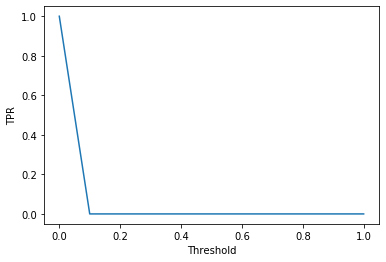

In [10]:
plt.plot(threshold_roc,tprlist,'-')
plt.xlabel('Threshold')
plt.ylabel('TPR')
plt.show()

In [11]:
threshold_roc

[0.0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6000000000000001,
 0.7000000000000001,
 0.8,
 0.9,
 1.0]

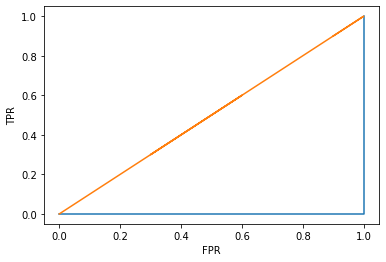

In [12]:
#plotting ROC
plt.plot(fprlist,tprlist,'-')
plt.xlabel('FPR')
plt.ylabel('TPR')
x=list({0.0,0.3,0.6,0.9,1.0})
plt.plot(x,x,'-')
plt.show()

In [13]:
'''
calculate AUC
'''
'''
itr=0
for k in range(len(dataset)-2):#doing -2 instead of -1 because k starts from 0 and not from 1
  for i in range(k+1,len(dataset)-1):#doing -1 instead of length i.e n because indexing of dataset is from 0 to n-1
    if dataset['Ground Truth'][k] < dataset['Ground Truth'][i]:
      itr+=1
  #print(itr)
auc = itr/(20*2000)
print(auc)
'''

"\nitr=0\nfor k in range(len(dataset)-2):#doing -2 instead of -1 because k starts from 0 and not from 1\n  for i in range(k+1,len(dataset)-1):#doing -1 instead of length i.e n because indexing of dataset is from 0 to n-1\n    if dataset['Ground Truth'][k] < dataset['Ground Truth'][i]:\n      itr+=1\n  #print(itr)\nauc = itr/(20*2000)\nprint(auc)\n"

In [14]:
'''
calculate AUC
'''
itr=0
for i in range(len(tprlist)-2):
  itr = itr + ((tprlist[i]+tprlist[i+1])/2)*(fprlist[i]-fprlist[i+1])
print(itr)

0.0


In [0]:
'''
here we do calculations for plotting PPVk,
'''
ppvk = list()
thres_list = list()
k_list = list()
dec_score_dataframe = dataset.sort_values(by=['Score'], ascending=False)#Sorting data in decending order according to their score
dec_score_dataframe = dec_score_dataframe.reset_index()
for k in range(len(dec_score_dataframe)-1):
  tp=0
  topK_thres =dec_score_dataframe[:k+1]#taking top k subset based on scores, but using k+1 as indexing is from 0
  topK_thres=topK_thres.reset_index()
  thres=topK_thres['Score'][len(topK_thres)-1]#last elements score
  #print(k)
  for i in range(len(topK_thres)-1):
    if topK_thres['Score'][i]>=thres and topK_thres['Ground Truth'][i] ==0:
      tp+=1
  ppvk.append(tp/(k+1))#calculating PPVk = tp/k values and saving them in list
  thres_list.append(thres)
  k_list.append(len(topK_thres))


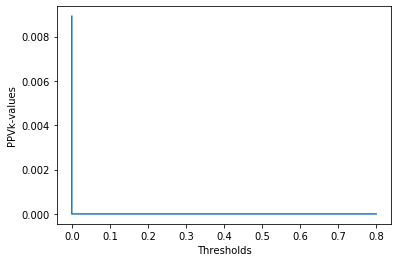

In [16]:
#plotting PPVk vs Threshold
plt.plot(thres_list,ppvk,'-')
plt.xlabel('Thresholds')
plt.ylabel('PPVk-values')
plt.show()

In [17]:
max(ppvk)

0.008915304606240713

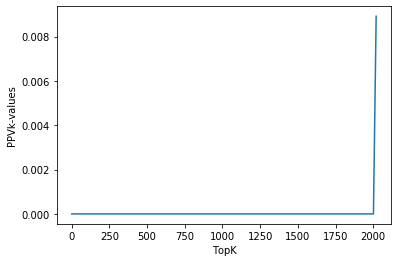

In [18]:
#plotting PPVk vs topk
plt.plot(k_list,ppvk,'-')
plt.xlabel('TopK')
plt.ylabel('PPVk-values')
plt.show()